# Imports


In [1]:
from utils.experiment import *
from utils.transforms import *
import utils.experiment as exp
import utils.transforms as tf
import importlib

importlib.reload(tf)
importlib.reload(exp)

<module 'utils.experiment' from 'c:\\Users\\Jannis\\Development\\wisemat-posture-classification\\utils\\experiment.py'>

# ✔️ Baseline

- Basic normalization
  - normalize values between 0 and 1 because images from the different datasets have different value ranges in the images
  - equalizeHist to have a unified brightness and contrast
  - normalize mean because it normalizes statistical properties of the images and is a recommended and often used step
  - same for standardization
- warum diese reihenfolge?


In [2]:
normalization = [
    Resize((32, 64)),
    Standardize(),
    NormalizeMinMax(),
    EqualizeHist(),
    Resize((64, 128)),
]

baseline = Experiment("Baseline", normalization + [ToTensor()])


# ✔️ Agressive Thresholding
- One could also try out different thresholding algorithms, but there was no difference in my case, but maybe in combination with other preprocessing steps it might make a difference. skimage provides a function for plotting the results of the provided thresholding algorithms

In [3]:
agressive_thresholding = Experiment(
    "Agressive Thresholding",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ],
)


# ✔️ Agressive Thresholding + Sobel


In [4]:
sobel = Experiment(
    "Agressive Thresholding + Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Sobel(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ],
)


# ✔️ Rolling Ball + Agressive Thresholding


In [5]:
rolling_ball = Experiment("Rolling Ball + Agressive Thresholding",
    [
        *normalization,
        RollingBall(radius=5),
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ]
)


# ✔️ Simple denoise
- comparison to agressive thresholding and rolling ball + thresholding which noise removal methods has the best result
- try different denoise functions?

In [6]:
simple_denoise = Experiment("Simple Denoise",
    [
        *normalization,
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ]
)

# ✔️ Fourier


In [7]:
fourier = Experiment("Fourier",
    [
        *normalization,
        Denoise(),
        Blur((3, 3)),
        HighPass(rad=50),
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ]
)


# Improving SLP

- hier zwei szenarien testen: einmal diese transformation auf beide datensätze anwenden und einmal nur auf slp und agressive thresholding oder so auf physionet
- interessante sache: später resizen behält in den schritten davor noch mehr details, womit besser preprocessed werden kann
- Potential: Menschen auf slp bildern vergrößern, damit die auf allen druckbildern ungefähr gleich groß sind


In [8]:
improve_slp = Experiment("Improve SLP",
    [
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ]
)


# Radial Transform
- als preprocessing schritt mit center origin
- als data augmentation schritt mit random origin

In [9]:
radial_transform = Experiment("Radial Transform",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Radial Transform on Sobel

In [10]:
radial_transform_sobel = Experiment("Radial Transform on Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Sobel(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        WarpPolar(),
        ToTensor(),
    ]
)


# ✔️ Dynamic Closing
-> Future Work: Look at each segment of the image instead of the whole image at once and do local dynamic closing

In [11]:
dynamic_closing = Experiment("Dynamic Closing",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        CloseInHoughDirection(),
        ToTensor(),
    ]
)

# Individual Transform

In [ ]:
individual_tranform = Experiment(
    "Individual Transform",
    transform=[ # Agressive Thresholding
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        ToTensor(),
    ],
    slp_transform=[ # Improve SLP
        Standardize(),
        NormalizeMinMax(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((64, 128)),
        ToTensor(),
    ],
)

# Evaluation

Running Experiment >>Radial Transform<<
Reading data took 0.7s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.1002
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0855
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0777
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0197
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0896
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0252
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0253
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0074
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.9971
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↗ 1.0544
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.9930
Train progress: [                       

1. Training took 30m 21.5s
1. Evaluation took 16.3s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0947
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0805
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0555
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0745
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0832
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0713
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↗ 1.0792
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0527
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.0837
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.9706
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 1.0177
Train progress: [                       

2. Training took 28m 53.9s
2. Evaluation took 15.4s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0980
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0959
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0848
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0512
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0638
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 1.0492
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0424
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0275
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↗ 1.0773
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0272
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 1.0478
Train progress: [                       

3. Training took 29m 41.1s
3. Evaluation took 13.9s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0968
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↗ 1.1057
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0818
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↗ 1.0902
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↘ 1.0586
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↗ 1.1041
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 1.0926
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↘ 1.0828
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 1.0124
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 1.0093
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↘ 0.9483
Train progress: [                       

4. Training took 29m 42.2s
4. Evaluation took 12.7s


Train progress: [                              ] 0/7370 Epoch: --- Loss: ------
Train progress: [                           ] 0/7370 Epoch: 1/10 Loss: ↘ 1.0958
Train progress: [                          ] 10/7370 Epoch: 1/10 Loss: ↘ 1.0927
Train progress: [                          ] 20/7370 Epoch: 1/10 Loss: ↘ 1.0382
Train progress: [                          ] 30/7370 Epoch: 1/10 Loss: ↘ 1.0173
Train progress: [                          ] 40/7370 Epoch: 1/10 Loss: ↗ 1.0731
Train progress: [                          ] 50/7370 Epoch: 1/10 Loss: ↘ 0.9867
Train progress: [                          ] 60/7370 Epoch: 1/10 Loss: ↘ 0.9846
Train progress: [                          ] 70/7370 Epoch: 1/10 Loss: ↗ 1.0237
Train progress: [                          ] 80/7370 Epoch: 1/10 Loss: ↘ 0.9925
Train progress: [                          ] 90/7370 Epoch: 1/10 Loss: ↘ 0.9698
Train progress: [                         ] 100/7370 Epoch: 1/10 Loss: ↗ 0.9985
Train progress: [                       

5. Training took 27m 0.4s
5. Evaluation took 12.6s
Successfully ran Experiment >>Radial Transform<<


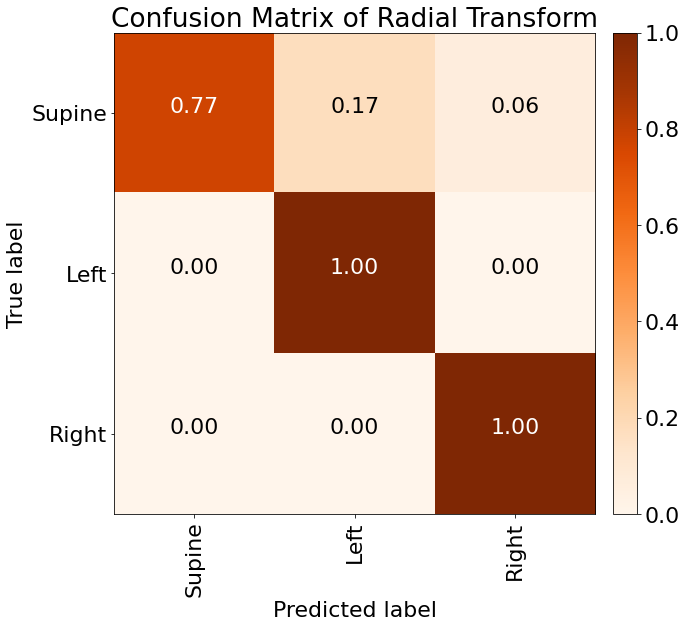

In [12]:
experiments = [radial_transform]

for experiment in experiments:
    experiment.run()